## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading data

##### CSV file encoding check

In [2]:
with open('data/test.csv') as f:
    print(f)

with open('data/train.csv') as f:
    print(f)

<_io.TextIOWrapper name='data/test.csv' mode='r' encoding='cp1250'>
<_io.TextIOWrapper name='data/train.csv' mode='r' encoding='cp1250'>


##### CSV file loading

In [3]:
df = pd.read_csv('data/train.csv', encoding='cp1250')
df_pred = pd.read_csv('data/test.csv', encoding='cp1250')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [4]:
df.shape

(891, 12)

In [5]:
df_pred.head(6)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [6]:
df_pred.shape

(418, 11)

In [7]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

##### NOTE: *I do not create a single dataset from the training and testing files to prevent data leakage due to future encoding. Same reason for early train test split.*

## Basic Data cleaning

##### 1.Duplicates.

In [8]:
df_full = pd.concat([df, df_pred], axis=0, ignore_index=True)

In [9]:
df_full[df_full.duplicated(subset=['Name'], keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [10]:
num_duplicates = df_full.duplicated(keep='first').sum()
num_duplicates

0

##### SUMMARY: *There aren't any duplicates. People with the same name and surname are coincidental.*

##### 2.Handling NaN, None, Null.

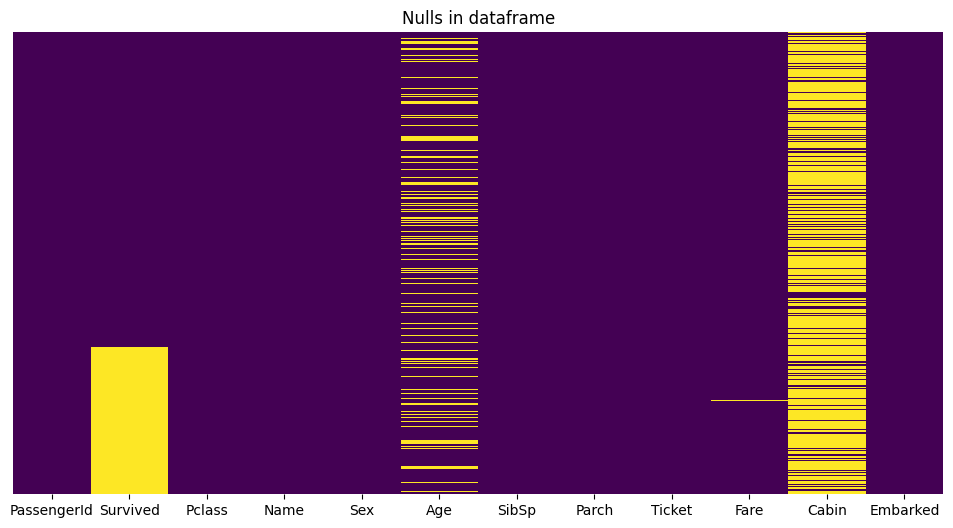

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_full.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Nulls in dataframe')
plt.savefig('../images/isnull.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE: *Part of column "Survived" has to be empty for testing. Column "Age" I will imput with median later. Column "Cabin" has too many missing values. I decide to convert it into HasCabin (0/1) after EDA.*

##### 3.Changing columns names.

In [12]:
X_train.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S


In [13]:
for df in [X_test, X_train, df_pred]:
    df.rename(columns={'PassengerId': 'Id', 'Pclass': 'Class', 'SibSp': 'Siblings_Spouses', 'Parch': 'Parents_Childs'}, inplace=True)
X_train.head(1)

,Id,Class,Name,Sex,Age,Siblings_Spouses,Parents_Childs,Ticket,Fare,Cabin,Embarked
692,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S


##### 4.Checking if there are negative intigers/floats.

In [14]:
X_train.dtypes

Id                    int64
Class                 int64
Name                 object
Sex                  object
Age                 float64
Siblings_Spouses      int64
Parents_Childs        int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
dtype: object

In [15]:
columns = [0, 1, 4, 5, 6, 8]
for df in [X_test, X_train, df_pred]:
    for col in columns:
        negatives = (df.iloc[:,col]< 0).any()
        print(negatives)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


##### SUMMARY: *There aren't any negative values.*

##### 5.Cleaned data save to CSV file.

In [16]:
X_train.to_csv('data/X_train_cleaned.csv', header=True, index=False)
X_test.to_csv('data/X_test_cleaned.csv', header=True, index=False)
y_train.to_csv('data/y_train_cleaned.csv', header=True, index=False)
y_test.to_csv('data/y_test_cleaned.csv', header=True, index=False)
df_pred.to_csv('data/df_pred_cleaned.csv', header=True, index=False)

## EDA - Exploratory Data Analysis

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                712 non-null    int64  
 1   Class             712 non-null    int64  
 2   Name              712 non-null    object 
 3   Sex               712 non-null    object 
 4   Age               575 non-null    float64
 5   Siblings_Spouses  712 non-null    int64  
 6   Parents_Childs    712 non-null    int64  
 7   Ticket            712 non-null    object 
 8   Fare              712 non-null    float64
 9   Cabin             160 non-null    object 
 10  Embarked          710 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 66.8+ KB


In [18]:
X_train.describe().map(lambda x: f'{x:0.2f}')

,Id,Class,Age,Siblings_Spouses,Parents_Childs,Fare
count,712.00,712.00,575.00,712.00,712.00,712.00
mean,444.41,2.31,29.81,0.49,0.39,31.82
std,257.47,0.83,14.49,1.06,0.84,48.06
min,1.00,1.00,0.42,0.00,0.00,0.00
25%,222.75,2.00,21.00,0.00,0.00,7.90
50%,439.50,3.00,28.50,0.00,0.00,14.45
75%,667.25,3.00,39.00,1.00,0.00,31.00
max,891.00,3.00,80.00,8.00,6.00,512.33


In [19]:
X_train.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'Class', 'Age', 'Siblings_Spouses', 'Parents_Childs', 'Fare'], dtype='object')

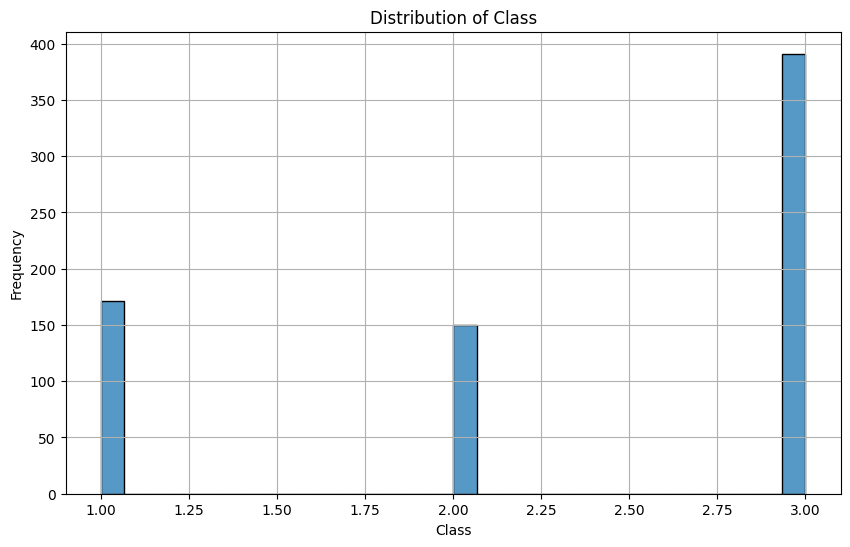

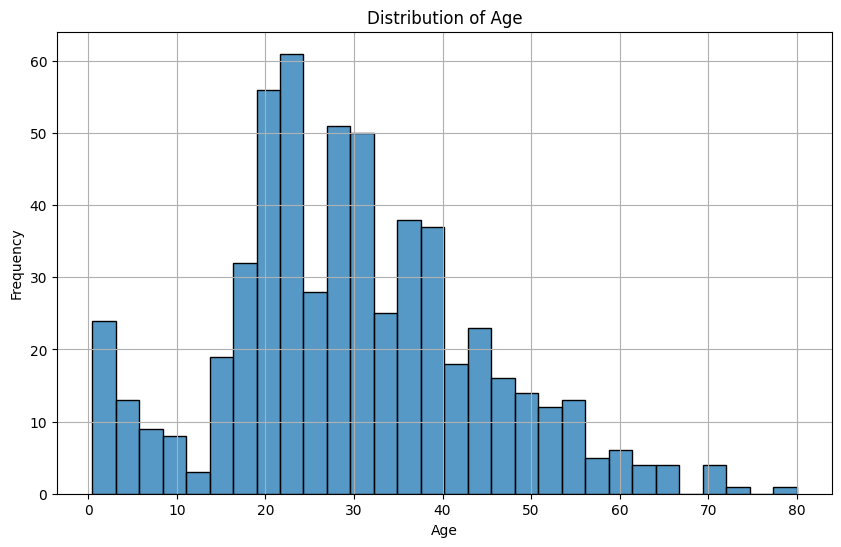

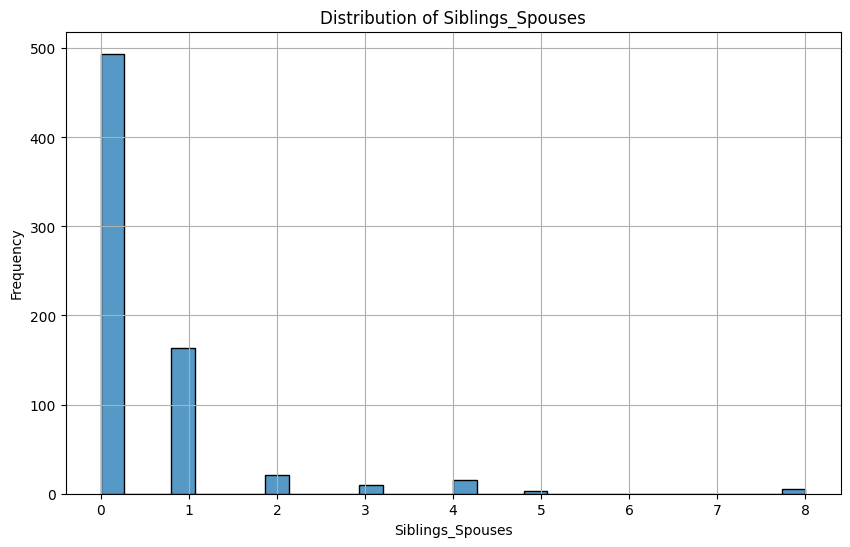

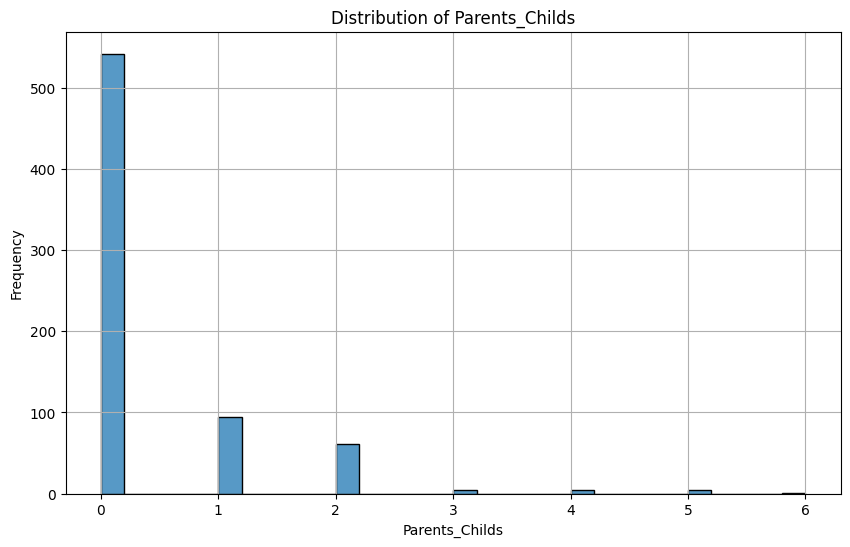

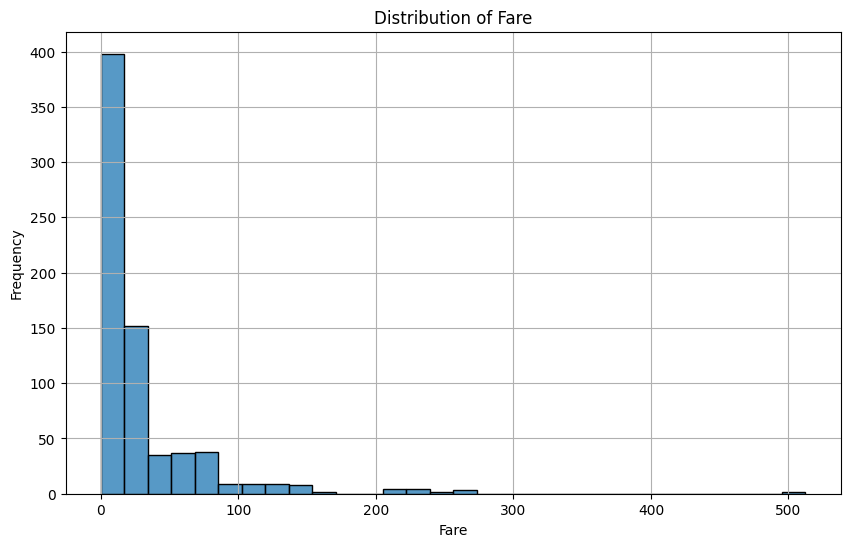

In [20]:
cols = ['Class', 'Age', 'Siblings_Spouses', 'Parents_Childs', 'Fare']
for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_train[col], bins=30)
    plt.title(f"Distribution of {col}")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.savefig(f'../images/{col}_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()

##### NOTE: *I will try to make log(Fare +1) to see outcome. "Age" may stay as it is and rest are discrete.*

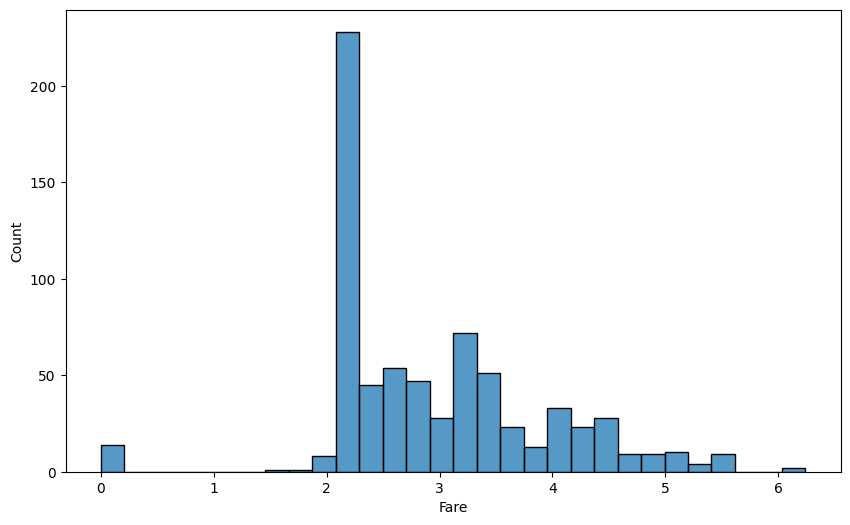

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(X_train['Fare']), bins=30)
plt.savefig('../images/log1p_fare_hist.png', dpi=300, bbox_inches='tight')
plt.show()

##### NOTE:*The distribution is still not satisfying. I decide to make quantiles and divide the set into three after EDA.*

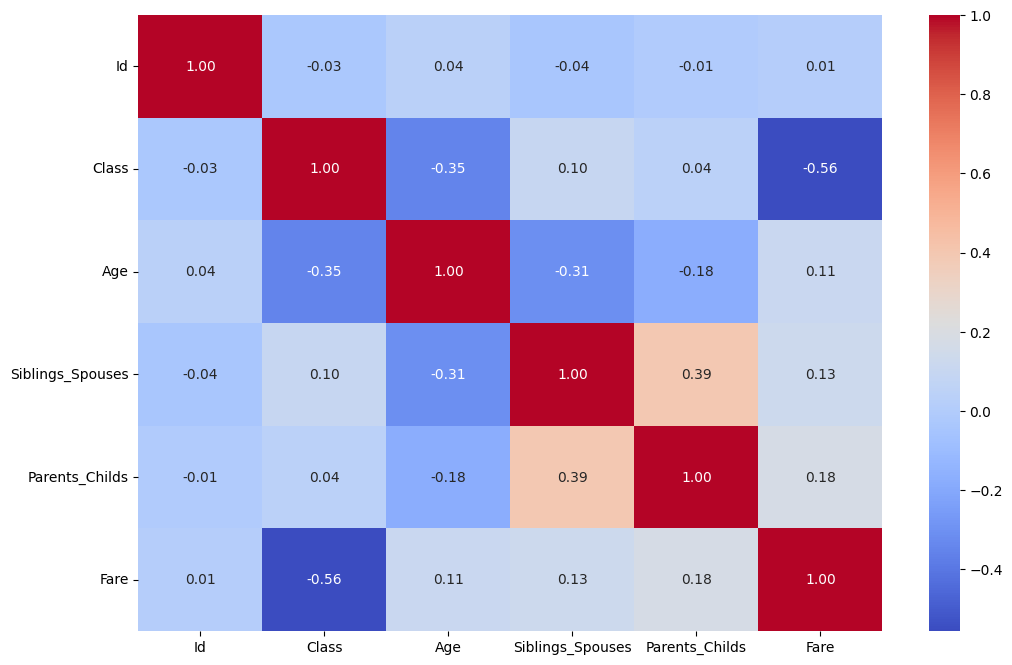

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(X_train.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.savefig('../images/corr_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

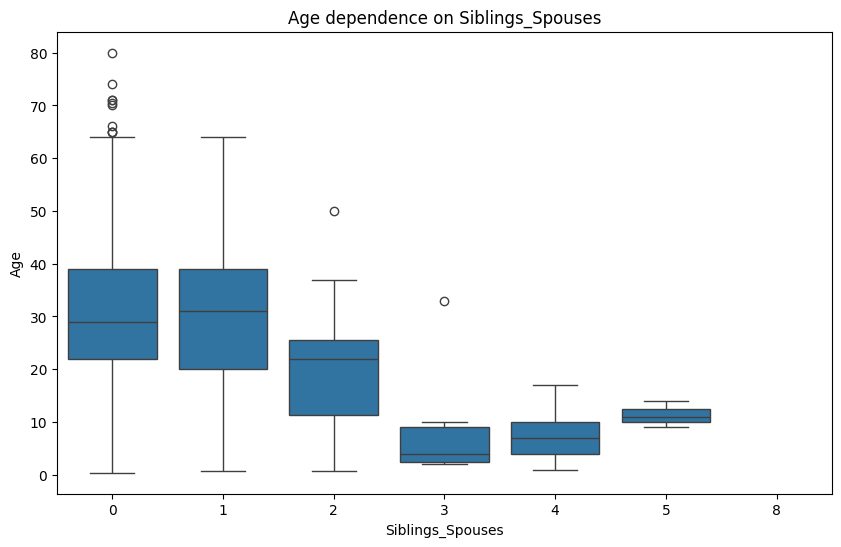

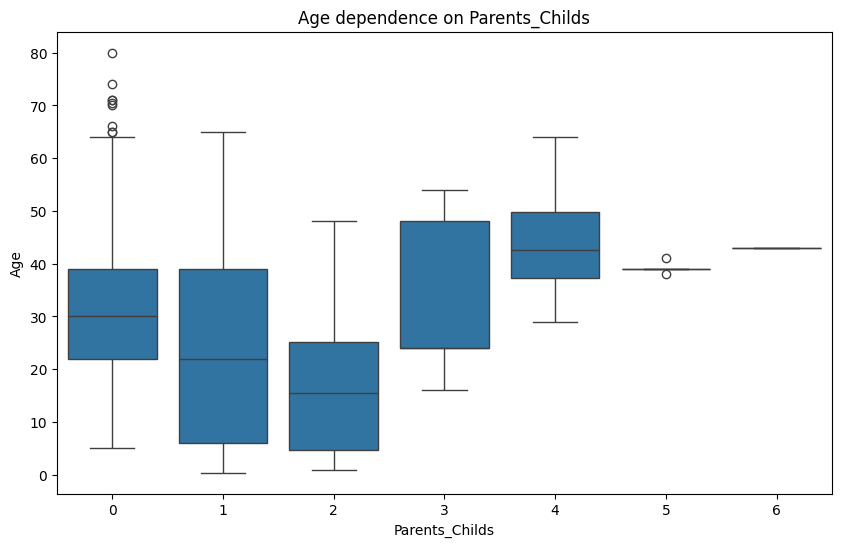

In [23]:
cols = ['Siblings_Spouses', 'Parents_Childs']
for col in cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=X_train[col], y=X_train['Age'])
    plt.title(f"Age dependence on {col}")
    plt.savefig(f'../images/{col}_box.png', dpi=300, bbox_inches='tight')
    plt.show()